In [59]:
import matplotlib as mpl
from cycler import cycler

import pedon as pe

rc_params = {
    "axes.prop_cycle": cycler(
        color=[
            "#3f90da",
            "#ffa90e",
            "#bd1f01",
            "#94a4a2",
            "#832db6",
            "#a96b59",
            "#e76300",
            "#b9ac70",
            "#717581",
            "#92dadd",
        ]
    ),
    "axes.titlesize": 10.0,
    "axes.grid": True,
    "axes.labelsize": 9.0,
    "xtick.labelsize": 8.0,
    "ytick.labelsize": 8.0,
    "legend.fontsize": 8.0,
    "legend.framealpha": 1.0,
    "figure.figsize": [7.0, 6.0],
}

mpl.rcParams.update(rc_params)

# Soil Models


In [60]:
k_s = 100  # saturated conductivity [cm/d]
theta_r = 0.03  # residual water content [-]
theta_s = 0.42  # saturated water content [-]

In [61]:
# Mualem-van Genuchten
alpha = 0.04  # shape parameter [1/cm]
n = 1.4  # shape parameter [-]

gen = pe.Genuchten(k_s=k_s, theta_r=theta_r, theta_s=theta_s, alpha=alpha, n=n)

In [62]:
# Brooks-Corey
h_b = 10  # bubbling pressure [cm]
l = 1.1  # noqa: E741

bro = pe.Brooks(k_s=k_s, theta_r=theta_r, theta_s=theta_s, h_b=h_b, l=l)

In [ ]:
# Gardner
a = 0.227
b = 0.5
m = 1.0

gar = pe.Gardner(k_s=k_s, theta_r=theta_r, theta_s=theta_s, a=a, b=b, m=m)

(1e-10, 1000.0)

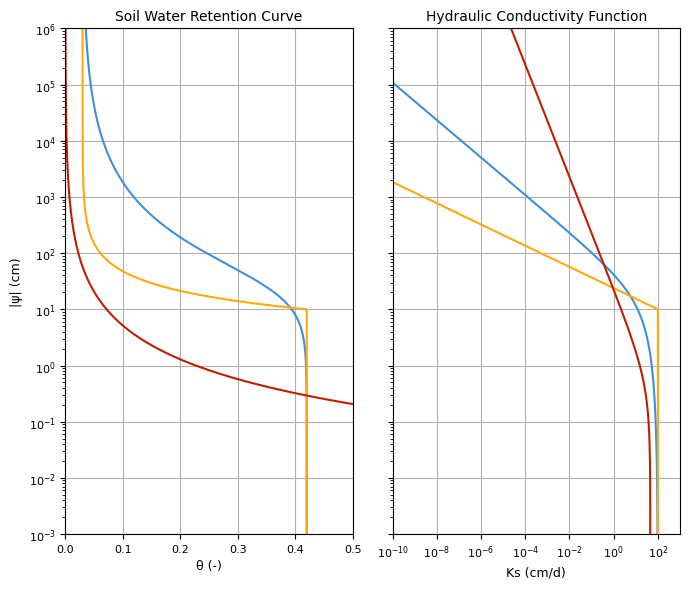

In [77]:
f, axs = plt.subplots(1, 2, sharey=True, layout="tight")

pe.plot_swrc(gen, ax=axs[0])
pe.plot_swrc(bro, ax=axs[0])
pe.plot_swrc(gar, ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_ylabel("|\N{GREEK SMALL LETTER PSI}| (cm)")
axs[0].set_title("Soil Water Retention Curve")
axs[0].set_xlabel("\N{GREEK SMALL LETTER THETA} (-)")
axs[0].set_xlim(0, 0.5)

pe.plot_hcf(gen, ax=axs[1])
pe.plot_hcf(bro, ax=axs[1])
pe.plot_hcf(gar, ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_title("Hydraulic Conductivity Function")
axs[1].set_xlabel("Ks (cm/d)")
axs[1].set_xscale("log")
axs[1].set_xlim(1e-10, 1e3)